In [214]:
# Imports
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score


In [215]:
# Load datasets
media_contacts = pd.read_csv("../data/media_contacts.csv")
socio_demos = pd.read_csv("../data/socio_demos.csv")

# Initial data overview and cleaning

## 1. Media Contacts Dataset

Let's start with a quick overview.

In [216]:
print(media_contacts.head(10))

   PERSON ID  TV_Total  FLYERS  Print_Total  Online_Video  Online_Display  \
0    5326201       0.0     0.0          0.0          10.0             4.0   
1     256895       0.0     0.0          1.0           0.0             0.0   
2    7894945       4.0     0.0          0.0           0.0             0.0   
3     797459       0.0     0.0          0.0          11.0             2.0   
4    5529182       0.0     0.0          0.0           7.0             3.0   
5      17687       0.0     0.0          0.0           0.0             0.0   
6   62098432       4.0     0.0          0.0           6.0             5.0   
7   56489362       3.0     0.0          0.0           9.0             6.0   
8     275140       0.0     0.0          1.0           0.0             0.0   
9  666280698      81.0     3.0          1.0           0.0             0.0   

   Online Total  TikTok  YouTube_Total  YouTube_Mobile  YouTube_Desktop  \
0          14.0     0.0            0.0             0.0              0.0   
1 

In [217]:
print(media_contacts.info())  # Check column types and missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15854 entries, 0 to 15853
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PERSON ID        15854 non-null  int64  
 1   TV_Total         15854 non-null  float64
 2   FLYERS           15854 non-null  float64
 3   Print_Total      15854 non-null  float64
 4   Online_Video     15853 non-null  float64
 5   Online_Display   15852 non-null  float64
 6   Online Total     15853 non-null  float64
 7   TikTok           15850 non-null  float64
 8   YouTube_Total    15851 non-null  float64
 9   YouTube_Mobile   15852 non-null  float64
 10  YouTube_Desktop  15853 non-null  float64
 11  YouTube_Tablet   15851 non-null  float64
 12  YouTube CTV      15853 non-null  float64
 13  Pinterest        15854 non-null  float64
 14  Purchase         15854 non-null  int64  
dtypes: float64(13), int64(2)
memory usage: 1.8 MB
None


In [218]:
print(media_contacts.describe())  # Get basic stats on numerical columns

          PERSON ID      TV_Total        FLYERS   Print_Total  Online_Video  \
count  1.585400e+04  15854.000000  15854.000000  15854.000000  15853.000000   
mean   9.363038e+07      5.736344      0.424877      0.690677      0.191446   
std    2.185159e+08      9.990565      0.971493      1.692449      1.013844   
min    1.000000e+00      0.000000      0.000000      0.000000      0.000000   
25%    5.410050e+04      0.000000      0.000000      0.000000      0.000000   
50%    9.586395e+05      1.000000      0.000000      0.000000      0.000000   
75%    4.665581e+07      7.000000      0.000000      1.000000      0.000000   
max    9.988330e+08    113.000000      3.000000     23.000000     18.000000   

       Online_Display  Online Total        TikTok  YouTube_Total  \
count    15852.000000  15853.000000  15850.000000   15851.000000   
mean         0.087055      0.278496      0.046498       0.558766   
std          0.686021      1.371722      0.458838       1.283823   
min          0.0

In [219]:
print(media_contacts.isnull().sum())  # Count missing values

PERSON ID          0
TV_Total           0
FLYERS             0
Print_Total        0
Online_Video       1
Online_Display     2
Online Total       1
TikTok             4
YouTube_Total      3
YouTube_Mobile     2
YouTube_Desktop    1
YouTube_Tablet     3
YouTube CTV        1
Pinterest          0
Purchase           0
dtype: int64


All column values are numeric

In [220]:
# Checking that all Purchase values are consistent
print(media_contacts["Purchase"].unique())

[1 0]


In [221]:
# Cleaning column names
media_contacts = media_contacts.rename(columns=lambda x: x.strip().replace(" ", "_"))  # Remove spaces from column names

In [222]:
# Fill missing values in media_contacts with 0 (assuming missing means no exposure)
media_contacts.fillna(0, inplace=True)

## 2. Socio Demos Dataset:

In [223]:
print(socio_demos.head(10))

   Person ID    weight    BIRTHDAY  Gender Number_of children  \
0    5326201  11032.10  19971001.0    male                  0   
1     256895   2581.77  19730701.0  female                  0   
2    7894945   8219.48  19870201.0    male            1 child   
3     797459   6040.79  19870401.0    male         2 Children   
4    5529182  11635.16  19971001.0    male                  0   
5      17687  13456.38  19980401.0  female                  0   
6   62098432   3881.71  19870201.0  female                  0   
7   56489362   3993.45  19730501.0  female                  0   
8     275140   6353.90  19341201.0    male                  0   
9  666280698   2966.01  19560501.0    male                  0   

  People_in_Household  
0                2-HH  
1                2-HH  
2                3-HH  
3                4-HH  
4                2-HH  
5                2-HH  
6      1 -HH (female)  
7                2-HH  
8         1-HH (male)  
9                2-HH  


In [224]:
print(socio_demos.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15854 entries, 0 to 15853
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Person ID            15854 non-null  int64  
 1   weight               15854 non-null  object 
 2   BIRTHDAY             15850 non-null  float64
 3   Gender               15851 non-null  object 
 4   Number_of children   15852 non-null  object 
 5   People_in_Household  15851 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 743.3+ KB
None


In [226]:
print(socio_demos.isnull().sum())

Person ID              0
weight                 0
BIRTHDAY               4
Gender                 3
Number_of children     2
People_in_Household    3
dtype: int64


In [227]:
# Cleaning column names
socio_demos = socio_demos.rename(columns=lambda x: x.strip().replace(" ", "_"))

### Weight

In [228]:
# Convert weight to numeric
socio_demos["weight"] = pd.to_numeric(socio_demos["weight"], errors="coerce")

In [229]:
# Fill missing 'weight' values using median (since weight distribution may be skewed)
median_weight = socio_demos["weight"].median()
socio_demos["weight"] = socio_demos["weight"].fillna(median_weight)

### Birthday

In [230]:
# Feature engineering
socio_demos['Age'] = 2025 - pd.to_datetime(socio_demos['BIRTHDAY'], format='%Y%m%d').dt.year

# Fill missing 'Age' values using median
socio_demos["Age"] = socio_demos["Age"].fillna(socio_demos["Age"].median())

# Age Group
socio_demos['Age_Group'] = pd.cut(socio_demos['Age'], bins=[0, 17, 24, 34, 44, 54, 64, 150], 
                           labels=['Under 18', '18-24', '25-34', '35-44', '45-54', '55-64', '65+'])

# Drop BIRTHDAY column
socio_demos.drop(columns=["BIRTHDAY"], inplace=True)

### Gender

In [231]:
# print(socio_demos["Gender"].unique())
print(socio_demos["Gender"].value_counts(dropna=False))

Gender
male      8330
female    7521
NaN          3
Name: count, dtype: int64


In [232]:
socio_demos["Gender"] = socio_demos["Gender"].fillna("Unknown")

### Number of Children

In [233]:
print(socio_demos["Number_of_children"].unique())

['0' '1 child' '2 Children' '3 Kinder' nan]


In [234]:
# Convert categorical children column to numeric
socio_demos['Number_of_children'] = socio_demos['Number_of_children'].replace({'0': 0, '1 child': 1, '2 Children': 2, '3 Kinder': 3})

# Fill missing 'Age' values using median
socio_demos["Number_of_children"] = socio_demos["Number_of_children"].fillna(socio_demos["Number_of_children"].median())

C:\Users\ksbon\AppData\Local\Temp\ipykernel_14052\616464302.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  socio_demos['Number_of_children'] = socio_demos['Number_of_children'].replace({'0': 0, '1 child': 1, '2 Children': 2, '3 Kinder': 3})


### People in Household

In [235]:
print(socio_demos["People_in_Household"].value_counts(dropna=False))

People_in_Household
2-HH              6848
1 -HH (female)    2546
1-HH (male)       2368
3-HH              2021
4-HH              1528
5-HH               420
6-HH                92
7-HH                24
NaN                  3
8-HH                 2
10-HH                1
9-HH                 1
Name: count, dtype: int64


In [236]:
# Extract the first numeric value from the string and convert to integer
socio_demos["Household_Size"] = socio_demos["People_in_Household"].str.extract(r'(\d+)').astype(float)

# Fill missing values using median
socio_demos["Household_Size"] = socio_demos["Household_Size"].fillna(socio_demos["Household_Size"].median())

# Drop the original column
socio_demos.drop(columns=["People_in_Household"], inplace=True)

In [237]:
print(socio_demos.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15854 entries, 0 to 15853
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Person_ID           15854 non-null  int64   
 1   weight              15854 non-null  float64 
 2   Gender              15854 non-null  object  
 3   Number_of_children  15854 non-null  float64 
 4   Age                 15854 non-null  float64 
 5   Age_Group           15854 non-null  category
 6   Household_Size      15854 non-null  float64 
dtypes: category(1), float64(4), int64(1), object(1)
memory usage: 759.1+ KB
None


## Merging Datasets

In [238]:
# Merge datasets
data = pd.merge(media_contacts, socio_demos, left_on="PERSON_ID", right_on="Person_ID", how="inner")

# Drop IDs as they are no longer needed
data.drop(columns=["PERSON_ID"], inplace=True)

In [239]:
print(data.info())  # Check column types and missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16048 entries, 0 to 16047
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   TV_Total            16048 non-null  float64 
 1   FLYERS              16048 non-null  float64 
 2   Print_Total         16048 non-null  float64 
 3   Online_Video        16048 non-null  float64 
 4   Online_Display      16048 non-null  float64 
 5   Online_Total        16048 non-null  float64 
 6   TikTok              16048 non-null  float64 
 7   YouTube_Total       16048 non-null  float64 
 8   YouTube_Mobile      16048 non-null  float64 
 9   YouTube_Desktop     16048 non-null  float64 
 10  YouTube_Tablet      16048 non-null  float64 
 11  YouTube_CTV         16048 non-null  float64 
 12  Pinterest           16048 non-null  float64 
 13  Purchase            16048 non-null  int64   
 14  Person_ID           16048 non-null  int64   
 15  weight              16048 non-null  

In [240]:
print(data.describe())  # Get basic stats on numerical columns

           TV_Total        FLYERS   Print_Total  Online_Video  Online_Display  \
count  16048.000000  16048.000000  16048.000000  16048.000000    16048.000000   
mean       5.731493      0.424850      0.689369      0.191426        0.087114   
std        9.966786      0.971372      1.687651      1.012046        0.685571   
min        0.000000      0.000000      0.000000      0.000000        0.000000   
25%        0.000000      0.000000      0.000000      0.000000        0.000000   
50%        1.000000      0.000000      0.000000      0.000000        0.000000   
75%        7.000000      0.000000      1.000000      0.000000        0.000000   
max      113.000000      3.000000     23.000000     18.000000       13.000000   

       Online_Total        TikTok  YouTube_Total  YouTube_Mobile  \
count  16048.000000  16048.000000   16048.000000    16048.000000   
mean       0.278539      0.047420       0.560257        0.306705   
std        1.369052      0.466682       1.287871        0.991847  

In [241]:
print(data.isnull().sum())  # Count missing values

TV_Total              0
FLYERS                0
Print_Total           0
Online_Video          0
Online_Display        0
Online_Total          0
TikTok                0
YouTube_Total         0
YouTube_Mobile        0
YouTube_Desktop       0
YouTube_Tablet        0
YouTube_CTV           0
Pinterest             0
Purchase              0
Person_ID             0
weight                0
Gender                0
Number_of_children    0
Age                   0
Age_Group             0
Household_Size        0
dtype: int64


Purchase Rate: 49.59%


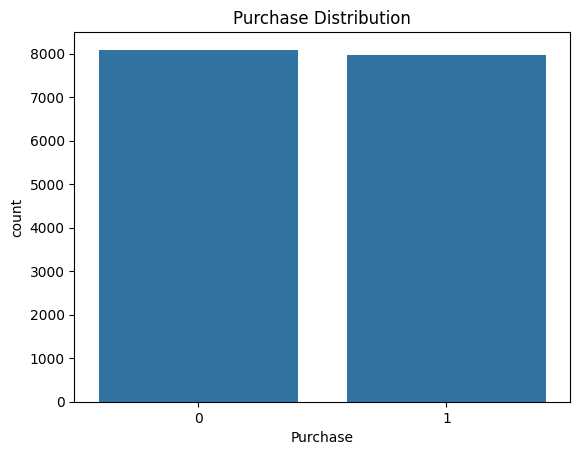

In [242]:
# Check purchase rate
purchase_rate = data['Purchase'].mean()
print(f"Purchase Rate: {purchase_rate:.2%}")

# Visualize class balance
sns.countplot(x='Purchase', data=data)
plt.title("Purchase Distribution")
plt.show()

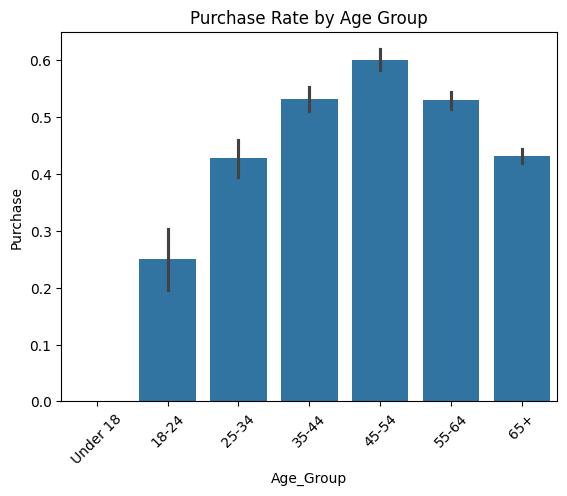

In [243]:
# Plot purchase rate by age group
sns.barplot(x='Age_Group', y='Purchase', data=data, estimator=lambda x: sum(x)/len(x))
plt.title("Purchase Rate by Age Group")
plt.xticks(rotation=45)
plt.show()


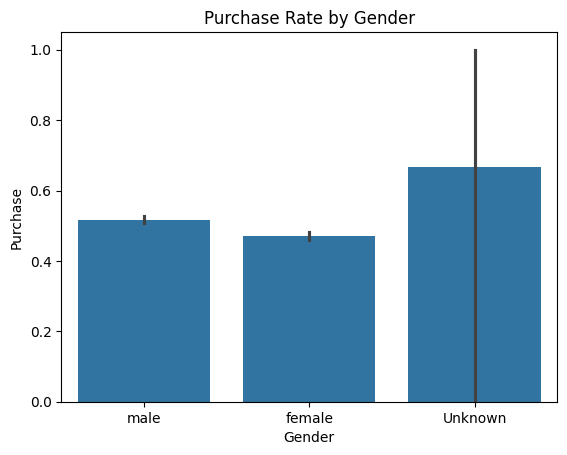

In [244]:
sns.barplot(x='Gender', y='Purchase', data=data, estimator=lambda x: sum(x)/len(x))
plt.title("Purchase Rate by Gender")
plt.show()

In [245]:
# Convert categorical children column to numeric
data['Children'] = data['Number_of children'].replace({'0': 0, '1 child': 1, '2 Children': 2, '3 Kinder': 3})

sns.barplot(x='Children', y='Purchase', data=data, estimator=lambda x: sum(x)/len(x))
plt.title("Purchase Rate by Number of Children")
plt.show()


KeyError: 'Number_of children'

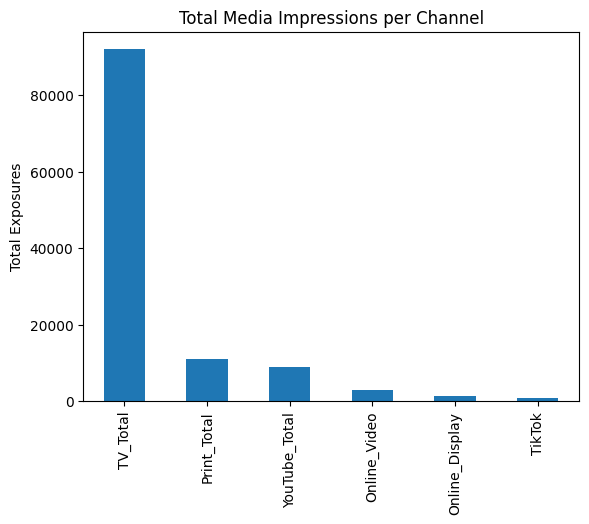

In [36]:
media_channels = ['TV_Total', 'Print_Total', 'Online_Video', 'Online_Display', 'YouTube_Total', 'TikTok']

# Sum exposure per channel
media_exposure = data[media_channels].sum().sort_values(ascending=False)

# Plot media exposure
media_exposure.plot(kind='bar')
plt.title("Total Media Impressions per Channel")
plt.ylabel("Total Exposures")
plt.show()


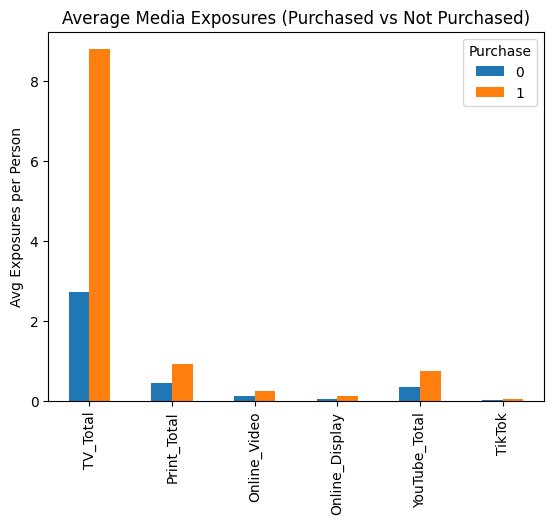

In [37]:
# Calculate average exposure for purchasers vs non-purchasers
purchase_by_channel = data.groupby('Purchase')[media_channels].mean().T
purchase_by_channel.plot(kind='bar')
plt.title("Average Media Exposures (Purchased vs Not Purchased)")
plt.ylabel("Avg Exposures per Person")
plt.show()


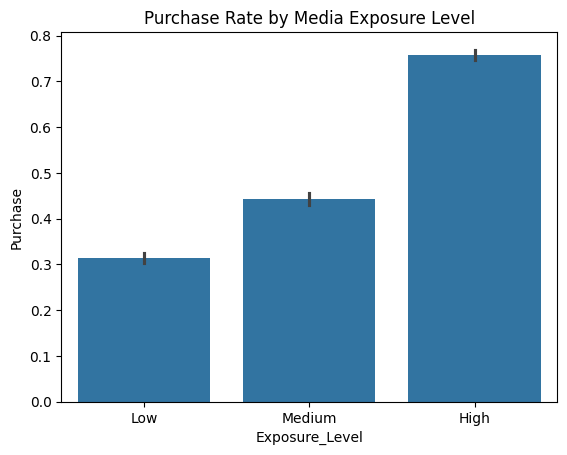

In [38]:
data['Total_Media_Exposure'] = data[media_channels].sum(axis=1)

# Bin people into Low, Medium, and High media exposure
data['Exposure_Level'] = pd.qcut(data['Total_Media_Exposure'], q=3, labels=['Low', 'Medium', 'High'])

sns.barplot(x='Exposure_Level', y='Purchase', data=data, estimator=lambda x: sum(x)/len(x))
plt.title("Purchase Rate by Media Exposure Level")
plt.show()

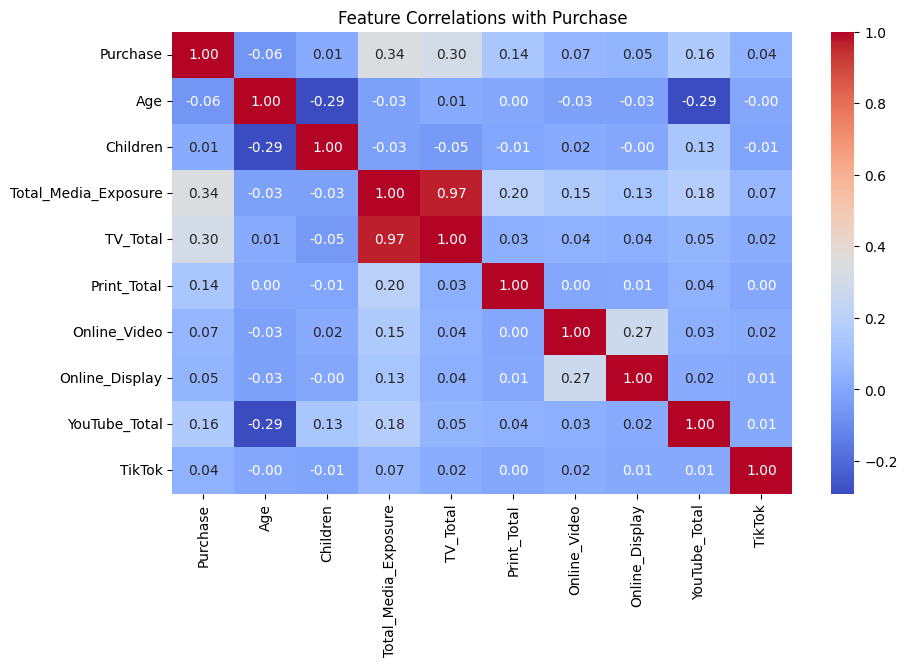

In [39]:
corr = data[['Purchase', 'Age', 'Children', 'Total_Media_Exposure'] + media_channels].corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlations with Purchase")
plt.show()

In [11]:
# Convert weight to numeric
socio_demos["weight"] = pd.to_numeric(data["weight"], errors="coerce")

In [12]:
# Step 1: Fill missing 'weight' values using median (since weight distribution may be skewed)
median_weight = data["weight"].median()
data["weight"].fillna(median_weight, inplace=True)

TypeError: Cannot convert ['11032.10' '2581.77' '8219.48' ... '#NULL!' '#NULL!' '#NULL!'] to numeric

In [ ]:
# Step 2: Fill missing 'Age' values using median age
median_age = data["Age"].median()
data["Age"].fillna(median_age, inplace=True)

In [8]:
purchase_rate_by_age = data.groupby("Age")["Purchase"].mean()
purchase_rate_by_gender = data.groupby("Gender")["Purchase"].mean()
purchase_rate_by_household = data.groupby("People_in_Household")["Purchase"].mean()

KeyError: 'Age'

In [40]:
# Merge datasets
# data = pd.merge(media_contacts, socio_demos, left_on="PERSON ID", right_on="Person ID")

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16048 entries, 0 to 16047
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   PERSON ID            16048 non-null  int64  
 1   TV_Total             16048 non-null  float64
 2   FLYERS               16048 non-null  float64
 3   Print_Total          16048 non-null  float64
 4   Online_Video         16047 non-null  float64
 5   Online_Display       16046 non-null  float64
 6   Online Total         16047 non-null  float64
 7   TikTok               16044 non-null  float64
 8   YouTube_Total        16045 non-null  float64
 9   YouTube_Mobile       16046 non-null  float64
 10  YouTube_Desktop      16047 non-null  float64
 11  YouTube_Tablet       16045 non-null  float64
 12  YouTube CTV          16047 non-null  float64
 13  Pinterest            16048 non-null  float64
 14  Purchase             16048 non-null  int64  
 15  Person ID            16048 non-null 

In [42]:
# Feature Engineering
data['Age'] = 2025 - pd.to_datetime(data['BIRTHDAY'], format='%Y%m%d').dt.year
data['Age_Group'] = pd.cut(data['Age'], bins=[0, 17, 24, 34, 44, 54, 64, 100], 
                           labels=['Under 18', '18-24', '25-34', '35-44', '45-54', '55-64', '65+'])
data['Total_Media_Exposure'] = data[['TV_Total', 'Print_Total', 'Online Total', 'TikTok', 'YouTube_Total']].sum(axis=1)

In [43]:
data.head(20)

,PERSON ID,TV_Total,FLYERS,Print_Total,Online_Video,Online_Display,Online Total,TikTok,YouTube_Total,YouTube_Mobile,...,Purchase,Person ID,weight,BIRTHDAY,Gender,Number_of children,People_in_Household,Age,Age_Group,Total_Media_Exposure
0,5326201,0.0,0.0,0.0,10.0,4.0,14.0,0.0,0.0,0.0,...,1,5326201,11032.10,19971001.0,male,0,2-HH,28.0,25-34,14.0
1,256895,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,...,1,256895,2581.77,19730701.0,female,0,2-HH,52.0,45-54,3.0
2,7894945,4.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1,7894945,8219.48,19870201.0,male,1 child,3-HH,38.0,35-44,5.0
3,797459,0.0,0.0,0.0,11.0,2.0,13.0,0.0,1.0,1.0,...,1,797459,6040.79,19870401.0,male,2 Children,4-HH,38.0,35-44,14.0
4,5529182,0.0,0.0,0.0,7.0,3.0,10.0,0.0,0.0,0.0,...,0,5529182,11635.16,19971001.0,male,0,2-HH,28.0,25-34,10.0
5,17687,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,17687,13456.38,19980401.0,female,0,2-HH,27.0,25-34,0.0
6,62098432,4.0,0.0,0.0,6.0,5.0,11.0,0.0,1.0,1.0,...,1,62098432,3881.71,19870201.0,female,0,1 -HH (female),38.0,35-44,16.0
7,56489362,3.0,0.0,0.0,9.0,6.0,15.0,0.0,2.0,0.0,...,1,56489362,3993.45,19730501.0,female,0,2-HH,52.0,45-54,20.0
8,275140,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,275140,6353.90,19341201.0,male,0,1-HH (male),91.0,65+,1.0
9,666280698,81.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,666280698,2966.01,19560501.0,male,0,2-HH,69.0,65+,82.0


In [44]:
# Listing Numerical columns
cols = data.columns
num_cols = list(data.select_dtypes('number'))
print(num_cols)

['PERSON ID', 'TV_Total', 'FLYERS', 'Print_Total', 'Online_Video', 'Online_Display', 'Online Total', 'TikTok', 'YouTube_Total', 'YouTube_Mobile', 'YouTube_Desktop', 'YouTube_Tablet', 'YouTube CTV', 'Pinterest', 'Purchase', 'Person ID', 'BIRTHDAY', 'Age', 'Total_Media_Exposure']


In [45]:
# Listing Categorical columns
cat_cols = list(set(cols) - set(num_cols))
print(cat_cols)

['Age_Group', 'Gender', 'weight', 'Number_of children', 'People_in_Household']


In [46]:
# Separating the numeric and categorical columns as each will require a separate approach
df_numeric = data[num_cols]
df_categorical = data[cat_cols]

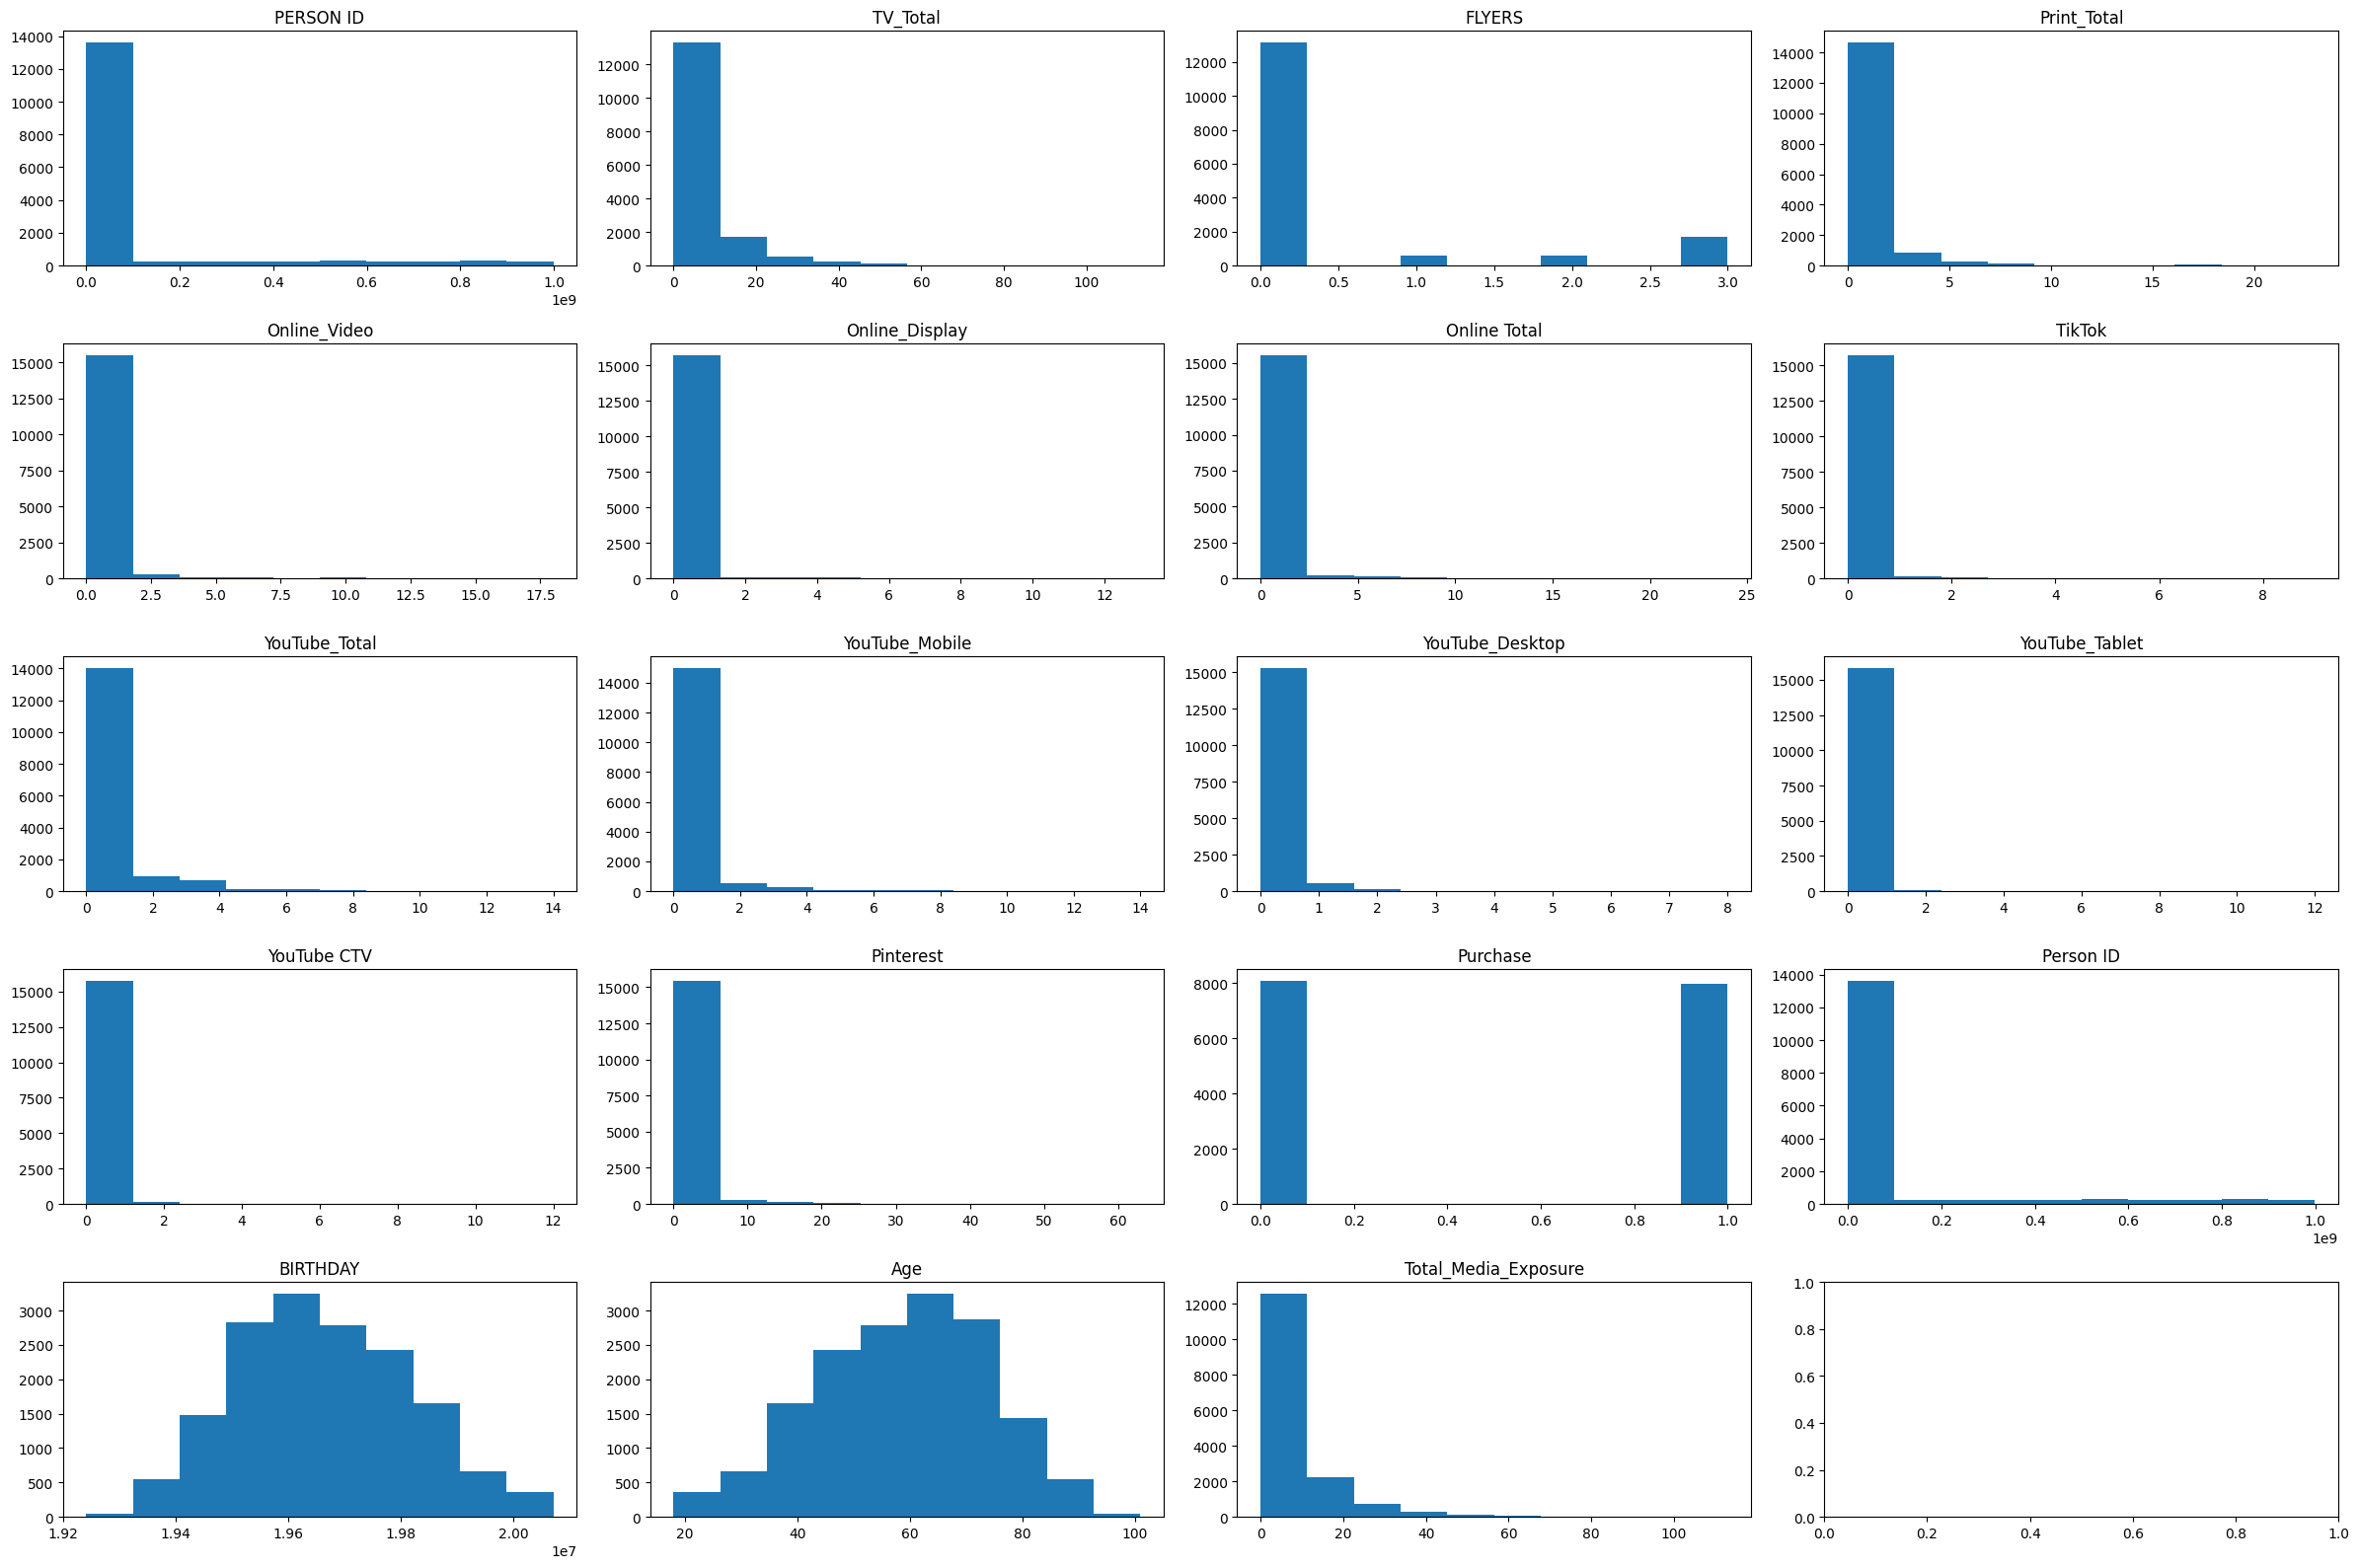

In [47]:
# Creating a grid of subplots for the numeric columns
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(24, 16))
axes = axes.flatten()  # Flatten 2D array to 1D

# Plot each histogram in a subplot
for i, col in enumerate(df_numeric.columns):
    plt.sca(axes[i])
    plt.hist(df_numeric[col])
    plt.title(col)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()

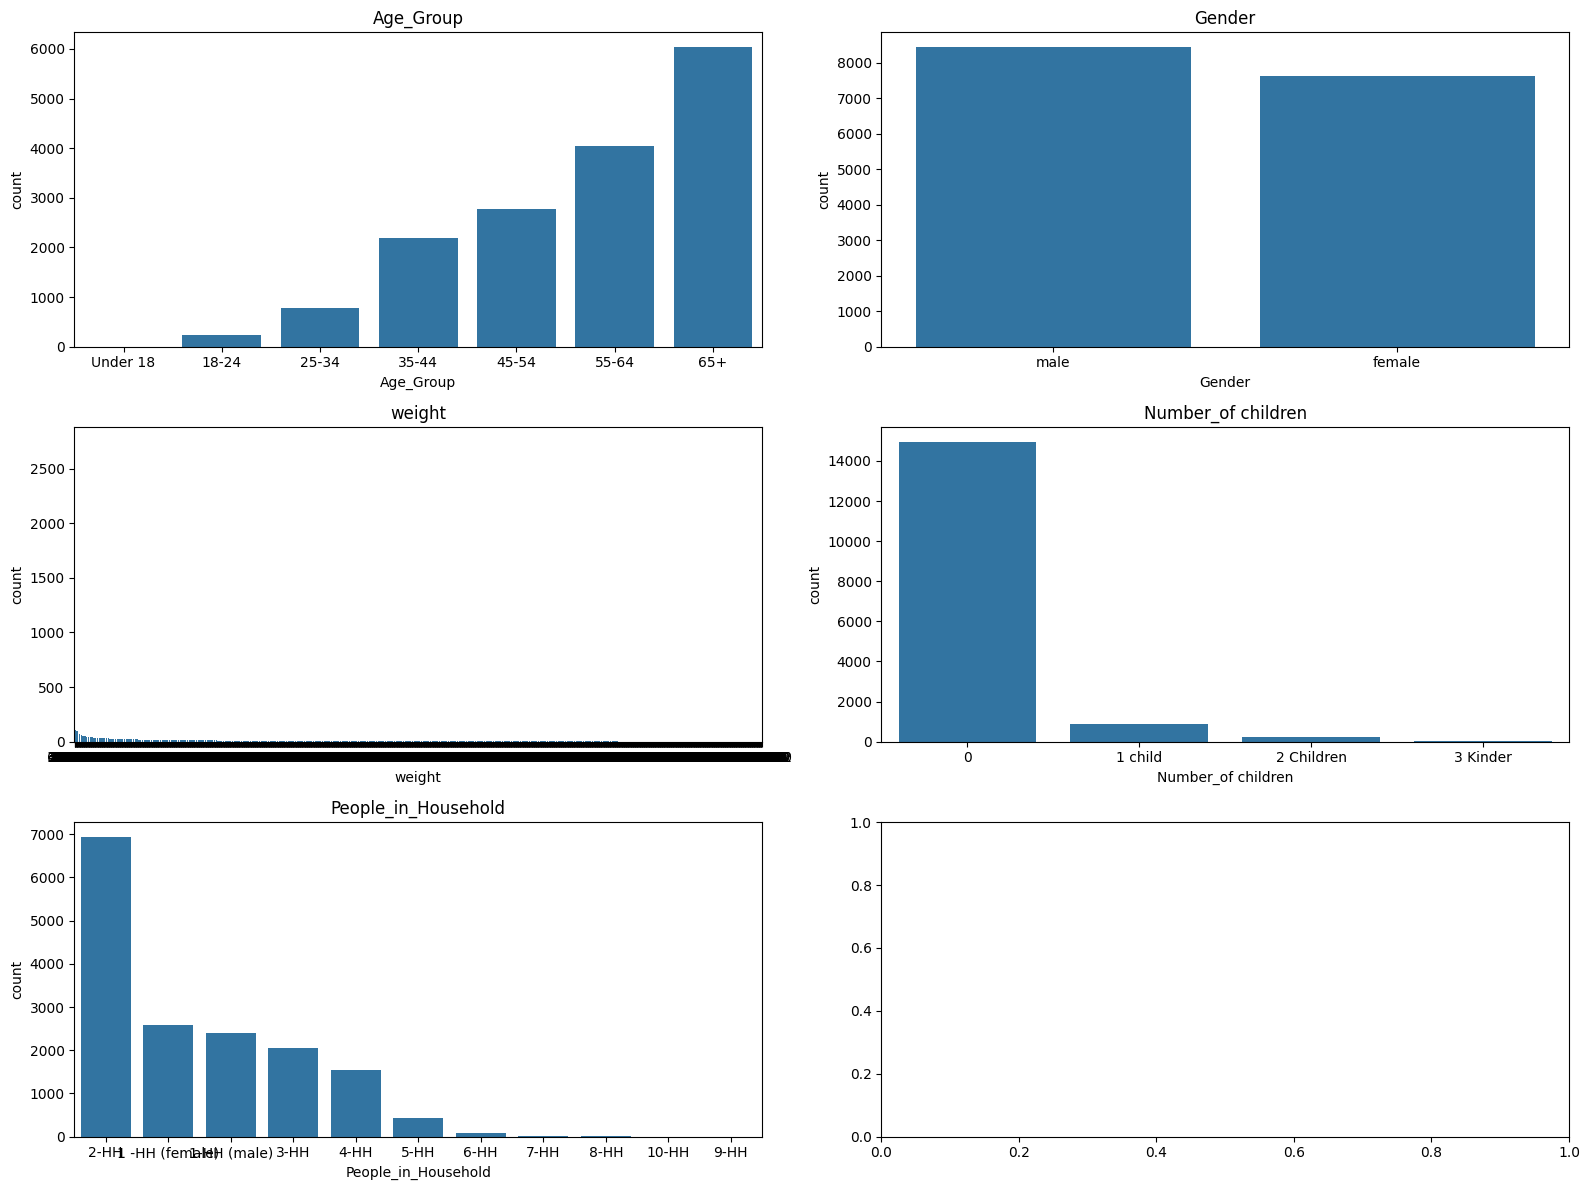

In [48]:
# Same grid of subplots as the one above but containing barplots with our categorical features
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(16, 12))
axes = axes.flatten()

# Plot each barplot in a subplot
for i, col in enumerate(df_categorical.columns):
    sns.barplot(x=df_categorical[col].value_counts().index, y=df_categorical[col].value_counts(), ax=axes[i])
    axes[i].set_title(col)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()

In [49]:
# Prepare data
X = data[['Age', 'Gender', 'Number_of children', 'Total_Media_Exposure']]
y = data['Purchase']
X = pd.get_dummies(X, drop_first=True)

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))

              precision    recall  f1-score   support

           0       0.61      0.68      0.64      1645
           1       0.62      0.54      0.58      1565

    accuracy                           0.61      3210
   macro avg       0.62      0.61      0.61      3210
weighted avg       0.62      0.61      0.61      3210

ROC-AUC: 0.648770113714713
